In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

In [ ]:
data_0 = pd.read_csv('/content/Blood_samples_dataset_balanced_2(f).csv')
data_1 = pd.read_csv('/content/blood_samples_dataset_test.csv')

In [ ]:
data = pd.concat([data_0, data_1])
print(data.shape)
pd.set_option("display.max_columns", None)
data.sample(10)

(2837, 25)


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
234,0.125637,0.822769,0.129084,0.675361,0.675284,0.305129,0.964985,0.413045,0.205948,0.329424,0.214462,0.476551,0.650057,0.075577,0.447853,0.416274,0.491852,0.490528,0.987177,0.404328,0.607833,0.797797,0.656203,0.460473,Diabetes
2009,0.254839,0.125606,0.964963,0.580719,0.815725,0.458429,0.893228,0.429131,0.195760,0.694565,0.522603,0.285962,0.233920,0.625938,0.282993,0.025010,0.422977,0.759931,0.651537,0.076343,0.510846,0.558042,0.228078,0.358865,Healthy
2178,0.898222,0.258706,0.933307,0.353082,0.373952,0.297138,0.900010,0.985488,0.679007,0.355774,0.460292,0.624374,0.664835,0.537559,0.766484,0.389461,0.529914,0.222687,0.772461,0.119994,0.894273,0.128124,0.379016,0.751438,Diabetes
1243,0.099982,0.542793,0.795435,0.196821,0.371385,0.156494,0.457720,0.046942,0.244670,0.603635,0.117410,0.246885,0.490788,0.613906,0.593129,0.601355,0.756330,0.406042,0.423574,0.734107,0.656629,0.291340,0.361959,0.631426,Anemia
2042,0.601246,0.012139,0.077618,0.999393,0.785517,0.044565,0.606256,0.793159,0.842642,0.959010,0.623631,0.566235,0.134105,0.365859,0.010612,0.508182,0.041583,0.275799,0.771136,0.900877,0.466364,0.520529,0.709233,0.481601,Diabetes
431,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1924,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,0.151013,0.306056,0.722350,0.535940,0.391481,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,Thromboc
563,0.196797,0.165429,0.866889,0.189737,0.844529,0.263589,0.306305,0.150618,0.915391,0.968273,0.425386,0.749109,0.610771,0.709064,0.630936,0.206223,0.798043,0.221106,0.760611,0.591314,0.544136,0.494329,0.012287,0.633088,Thalasse
213,0.080779,0.422381,0.747859,0.711762,0.387467,0.528601,0.288132,0.487605,0.618204,0.278717,0.416718,0.497018,0.333674,0.686142,0.770740,0.111030,0.043880,0.873681,0.167486,0.514829,0.207098,0.513864,0.088611,0.148124,Healthy
1293,0.099702,0.499443,0.242045,0.599439,0.619331,0.110368,0.234204,0.658299,0.571700,0.364312,0.753178,0.233537,0.377238,0.581587,0.231094,0.120251,0.042318,0.738031,0.538057,0.634947,0.918468,0.510068,0.103066,0.417032,Anemia


In [ ]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2837 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                       

In [ ]:
print("number of duplicate values: ", data_0.duplicated().sum())
data = data.drop_duplicates()
print(data.shape)

number of duplicate values:  2286
(551, 25)


In [ ]:
# Informations statistics
table = np.array(data.drop(columns=["Disease"]))
print(np.max(table))
print(np.min(table))

1.0008568144204304
-0.000991090314445


Disease
Diabetes    0.562613
Anemia      0.181488
Thalasse    0.112523
Heart Di    0.070780
Healthy     0.038113
Thromboc    0.034483
Name: proportion, dtype: float64


<ipython-input-19-684d84980189>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

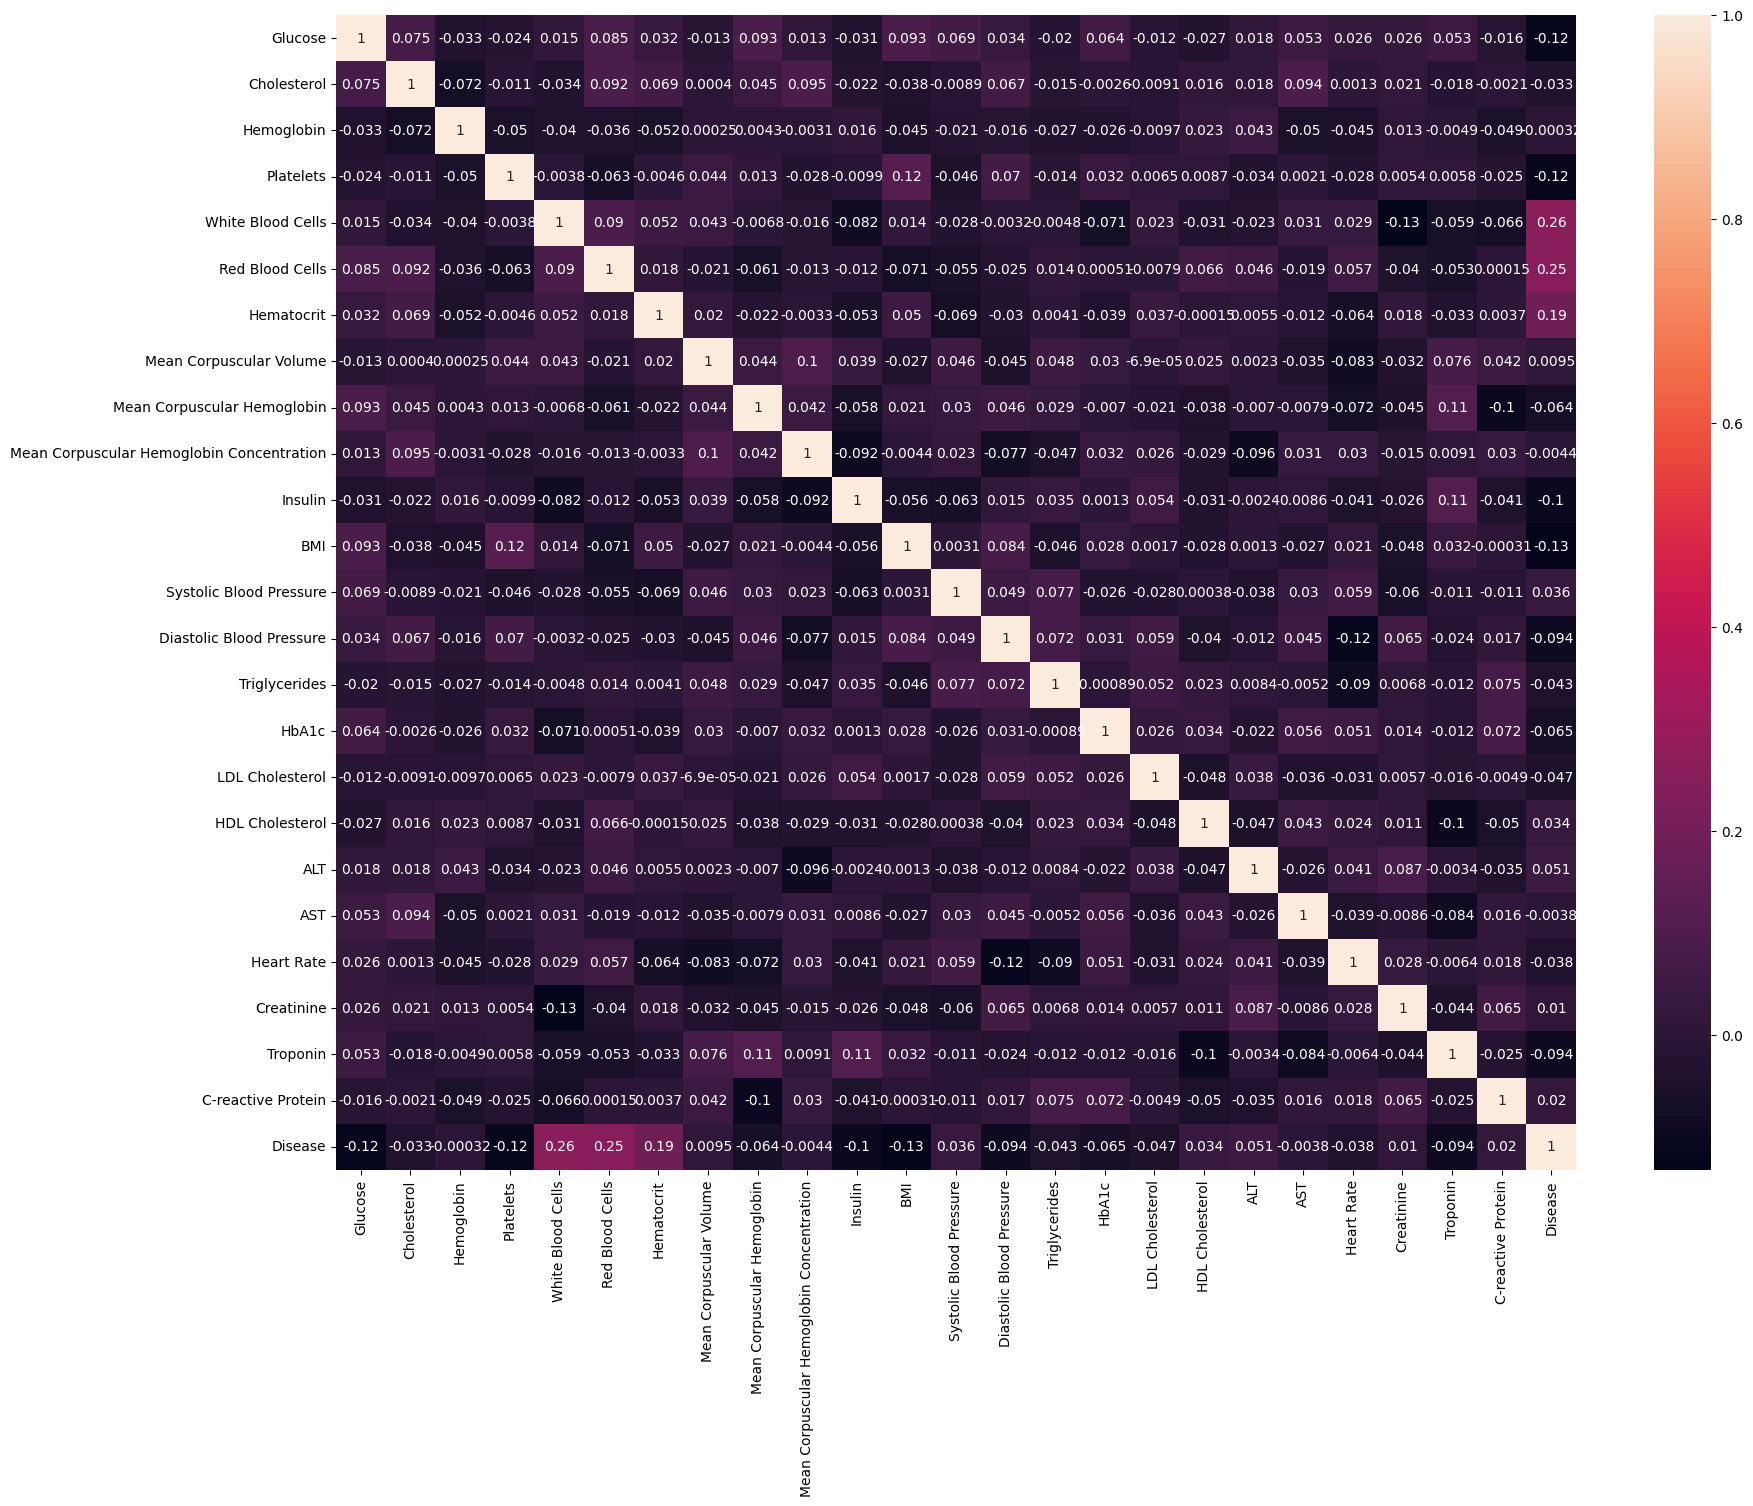

In [ ]:
print(data["Disease"].value_counts(normalize=True))
data["Disease"] = LabelEncoder().fit_transform(data["Disease"])
plt.figure(figsize=(20, 15))
sn.heatmap(data.corr(), annot=True)

In [ ]:
# sn.pairplot(data)
# plt.show

Disease
1    0.562613
0    0.181488
4    0.112523
3    0.070780
2    0.038113
5    0.034483
Name: proportion, dtype: float64


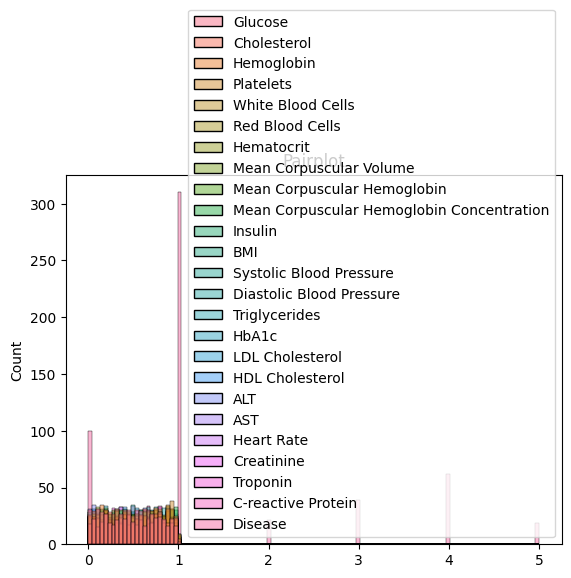

In [ ]:
print(data["Disease"].value_counts(normalize=True))  # Display normalized value counts of 'Disease'

# Encode 'Disease' column if it contains categorical data
data["Disease"] = LabelEncoder().fit_transform(data["Disease"])

# Plot histogram
sn.histplot(data)
plt.title('Pairplot')
plt.show()


In [ ]:
import plotly.express as px

# Create an interactive histogram for glucose levels
fig = px.histogram(data, x='Glucose', title='Distribution of Glucose Levels',
                   labels={'Glucose': 'Glucose Levels'}, nbins=30)

# Customize appearance
fig.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(title_font=dict(size=20), xaxis_title_font=dict(size=18), yaxis_title_font=dict(size=18))
fig.update_layout(xaxis=dict(title='Glucose Levels', titlefont=dict(size=16)),
                  yaxis=dict(title='Frequency', titlefont=dict(size=16)))

# Show the plot
fig.show()


In [ ]:

# # Convert scaled data to DataFrame
# data_train_scaled = pd.DataFrame(_train_scaled)

# # Plot histograms using Seaborn
# plt.figure(figsize=(12, 6))
# sn.histplot(data=df_train_scaled, bins=20, kde=True)
# plt.title('Histogram of Scaled Features')
# plt.xlabel('Feature Value')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
column_names = data.columns
print("Column Names:")
for col in column_names:
    print(col)

Column Names:
Glucose
Cholesterol
Hemoglobin
Platelets
White Blood Cells
Red Blood Cells
Hematocrit
Mean Corpuscular Volume
Mean Corpuscular Hemoglobin
Mean Corpuscular Hemoglobin Concentration
Insulin
BMI
Systolic Blood Pressure
Diastolic Blood Pressure
Triglycerides
HbA1c
LDL Cholesterol
HDL Cholesterol
ALT
AST
Heart Rate
Creatinine
Troponin
C-reactive Protein
Disease


In [ ]:
# Identify relevant features based on domain knowledge
relevant_features = ['Glucose','Cholesterol','Hemoglobin','Platelets','White Blood Cells','Red Blood Cells','Hematocrit','Mean Corpuscular Volume','Mean Corpuscular Hemoglobin',
'Mean Corpuscular Hemoglobin Concentration','Insulin','BMI','Systolic Blood Pressure','Diastolic Blood Pressure','Triglycerides','HbA1c',
'LDL Cholesterol','HDL Cholesterol','Heart Rate','Creatinine','C-reactive Protein','Disease']
# Replace with actual relevant features
# Subset the dataframe with relevant features
data_relevant = data[relevant_features]

# Extract features
# Example: Calculating ratios
data['ratio_feature'] = data['Glucose'] / data['Insulin']

# Example: Deriving new features
data['new_feature'] = data['Hemoglobin'] - data['Platelets']

# Add the target feature 'Disease' to the dataframe
data_relevant['Disease'] = data['Disease']


# Save the updated dataset
data.to_csv('extracted_features_blood_samples_dataset.csv', index=False)


<ipython-input-25-1ed363b8010e>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x = data.drop(columns=["Disease"])
y = data["Disease"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=42)
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (385, 26) (385,)
Testing set shape: (166, 26) (166,)


In [ ]:

#  Convert scaled data to DataFrame
# data_train_scaled = pd.DataFrame(x_train)

#  Plot histograms using Seaborn
#  plt.figure(figsize=(12, 6))
# sn.histplot(data=data_train, bins=20, kde=True)
# plt.title('Histogram of Scaled Features')
# plt.xlabel('Feature Value')
# plt.ylabel('Frequency')
# plt.show()

NameError: name 'data_train' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
model_1 = LogisticRegression(max_iter=1000)
model_2 = KNeighborsClassifier(n_neighbors=100)
model_3 = DecisionTreeClassifier()
model_4 = RandomForestClassifier(n_estimators=1000)
model_5 = SVC()
models = [model_1, model_2, model_3, model_4, model_5]

for idx, model in enumerate(models, start=1):
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test) * 100
    print(f"% Accuracy for Model {idx}: {accuracy:.2f}%")
# for idx,model in (model_1, model_2, model_3, model_4, model_5):
#   model.fit(x_train, y_train)
  # print("% Accuracy for ",model ,"to be :", model.score(x_test, y_test)*100, "%")

% Accuracy for Model 1: 64.46%
% Accuracy for Model 2: 60.84%
% Accuracy for Model 3: 93.98%
% Accuracy for Model 4: 91.57%
% Accuracy for Model 5: 60.84%


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define parameter distributions for each model
param_dist_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Regularization parameter for Logistic Regression
param_dist_knn = {'n_neighbors': randint(1, 100)}  # Number of neighbors for KNN
param_dist_dt = {'max_depth': [None, 5, 10, 15, 20]}  # Maximum depth of the decision tree
param_dist_rf = {'n_estimators': randint(1, 200)}  # Number of trees for Random Forest
param_dist_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}  # Regularization parameter and kernel coefficient for SVC

# Create RandomizedSearchCV objects for each model
random_search_lr = RandomizedSearchCV(LogisticRegression(), param_dist_lr, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_dist_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_dist_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_svc = RandomizedSearchCV(SVC(), param_dist_svc, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# List of models and their corresponding RandomizedSearchCV objects
models = [
    ('Logistic Regression', random_search_lr),
    ('K-Nearest Neighbors', random_search_knn),
    ('Decision Tree', random_search_dt),
    ('Random Forest', random_search_rf),
    ('Support Vector Classifier', random_search_svc)
]

best_model = None
best_accuracy = 0

# Iterate over each model and perform hyperparameter tuning
for model_name, random_search in models:
    random_search.fit(x_train, y_train)
    print("Best parameters for", model_name, ":", random_search.best_params_)
    print("% Accuracy for", model_name, "after hyperparameter tuning:", random_search.best_score_ * 100, "%")

    # Check if the current model has the highest accuracy so far
    if random_search.best_score_ > best_accuracy:
        best_model = model_name
        best_accuracy = random_search.best_score_

# Print the best model among the four
print("Best model after hyperparameter tuning:", best_model)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pr

Best parameters for Logistic Regression : {'C': 1}
% Accuracy for Logistic Regression after hyperparameter tuning: 60.259740259740255 %
Best parameters for K-Nearest Neighbors : {'n_neighbors': 21}
% Accuracy for K-Nearest Neighbors after hyperparameter tuning: 57.66233766233767 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.



Best parameters for Decision Tree : {'max_depth': 10}
% Accuracy for Decision Tree after hyperparameter tuning: 89.6103896103896 %
Best parameters for Random Forest : {'n_estimators': 103}
% Accuracy for Random Forest after hyperparameter tuning: 85.45454545454547 %
Best parameters for Support Vector Classifier : {'gamma': 0.01, 'C': 100}
% Accuracy for Support Vector Classifier after hyperparameter tuning: 58.96103896103896 %
Best model after hyperparameter tuning: Decision Tree


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to evaluate model performance
def evaluate_model(model, x_test, y_test):
    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='weighted')
    print("Precision:", precision)

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='weighted')
    print("Recall:", recall)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1-score:", f1)

    # Calculate ROC-AUC score (if applicable)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        print("ROC-AUC score:", roc_auc)

# Evaluate each tuned model on the test dataset
for model_name, random_search in models:
    print("Evaluation results for", model_name)
    evaluate_model(random_search.best_estimator_, x_test, y_test)
    print()


Evaluation results for Logistic Regression
Accuracy: 0.6445783132530121
Precision: 0.6186983101899122
Recall: 0.6445783132530121
F1-score: 0.6135693123338913
ROC-AUC score: 0.7744119126909322

Evaluation results for K-Nearest Neighbors
Accuracy: 0.5843373493975904
Precision: 0.44508672989831666
Recall: 0.5843373493975904
F1-score: 0.5003657741101022
ROC-AUC score: 0.7205174638617587

Evaluation results for Decision Tree
Accuracy: 0.9216867469879518
Precision: 0.9316436251920123
Recall: 0.9216867469879518
F1-score: 0.917429473099096
ROC-AUC score: 0.9726166343193298

Evaluation results for Random Forest
Accuracy: 0.8975903614457831
Precision: 0.8988646895273401
Recall: 0.8975903614457831
F1-score: 0.8938992905419588
ROC-AUC score: 0.9899372881533676

Evaluation results for Support Vector Classifier
Accuracy: 0.6445783132530121
Precision: 0.6063992813358697
Recall: 0.6445783132530121
F1-score: 0.6149826098271042



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



ROC curve for Logistic Regression


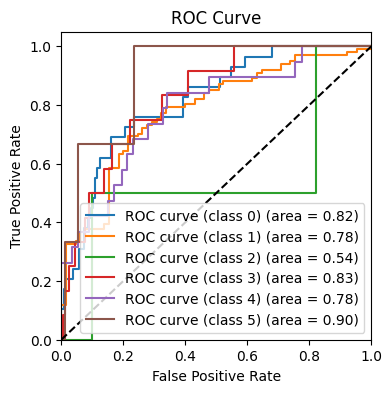

ROC curve for K-Nearest Neighbors


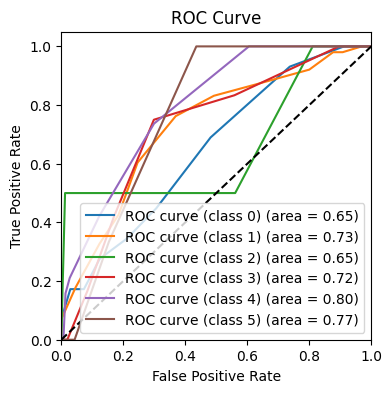

ROC curve for Decision Tree


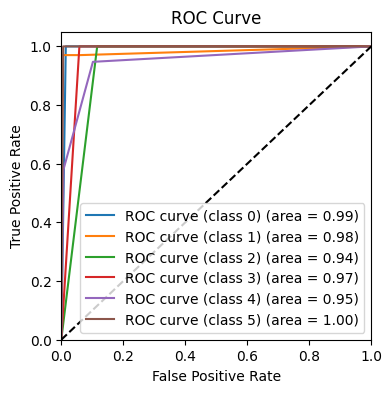

ROC curve for Random Forest


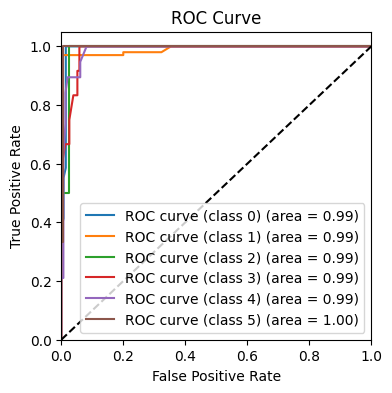

ROC curve for Support Vector Classifier
ROC curve cannot be plotted for model SVC


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
# Define a function to plot ROC curve
def plot_roc_curve(model, x_test, y_test):
    if hasattr(model, "predict_proba"):
        # Binarize the labels
        lb = LabelBinarizer()
        y_test_bin = lb.fit_transform(y_test)

        # Compute ROC curve and ROC area for each class
        y_score = model.predict_proba(x_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(lb.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve
        plt.figure(figsize=(4, 4))  # Adjust figure size here
        for i in range(len(lb.classes_)):
            plt.plot(fpr[i], tpr[i], label='ROC curve (class {0}) (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("ROC curve cannot be plotted for model", type(model).__name__)

# Plot ROC curve for each tuned model
for model_name, random_search in models:
    print("ROC curve for", model_name)
    plot_roc_curve(random_search.best_estimator_, x_test, y_test)


In [ ]:
# matrix_confusion = pd.crosstab(y_test, prediction, rownames=["Actual"], colnames=["Predicted"])
# sn.heatmap(matrix_confusion, annot=True)

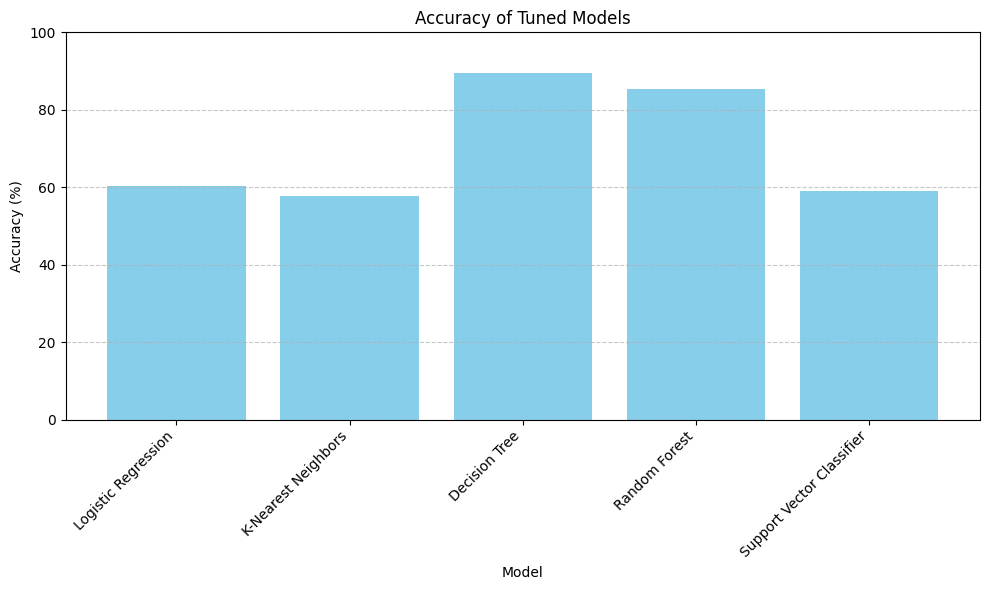

In [ ]:
import matplotlib.pyplot as plt

# List to store model names and their corresponding accuracies
model_names = []
accuracies = []

# Iterate over each tuned model
for model_name, random_search in models:
    # Calculate accuracy for the model
    accuracy = random_search.best_score_ * 100

    # Append model name and accuracy to the lists
    model_names.append(model_name)
    accuracies.append(accuracy)

# Plot accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Tuned Models')
plt.ylim([0, 100])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# model.py
def load_model():
    # Load or define your model here
    model_path = r"C:\Users\Simran\OneDrive\Desktop\model.py"  # Load or define your model
    return model_path
